# Viagens para a Índia / Voyages to India

Baseado em / Based on

> Wicki, J. (1967). Liste der Jesuiten-Indienfahrer 1541-1758. Aschendorff. https://books.google.com/books?id=bEoXzgEACAAJ



In [3]:
from timelink.notebooks import TimelinkNotebook

tlnb = TimelinkNotebook(db_type='sqlite')
tlnb.print_info(show_token=True)

Timelink version: 1.1.10
Project name: dehergne-locations
Project home: /Users/jrc/mhk-home/sources/dehergne-locations
Database type: sqlite
Database name: dehergne_locations
Kleio image: timelinkserver/kleio-server
Kleio server token: zdxg0IibKTVg554IoQz3DV4OvXmLKsRW
Kleio server URL: http://127.0.0.1:8088
Kleio server home: /Users/jrc/mhk-home/sources/dehergne-locations
Kleio server container: objective_joliot
Kleio version requested: latest
Kleio server version: 12.4.567 (2024-02-07 13:02:03)
SQLite directory: /Users/jrc/mhk-home/sources/dehergne-locations/database/sqlite
Call print_info(show_password=True) to show the Postgres password
TimelinkNotebook(project_name=dehergne-locations, project_home=/Users/jrc/mhk-home/sources/dehergne-locations, db_type=sqlite, db_name=dehergne_locations, kleio_image=timelinkserver/kleio-server, kleio_version=latest, postgres_image=postgres, postgres_version=latest)


## List all who travelled in the same "armada"

Wicki, J. (1967). Liste der Jesuiten-Indienfahrer 1541-1758. Aschendorff. https://books.google.com/books?id=bEoXzgEACAAJ


In [8]:
import pyuca  # to sort accented characters properly

import pandas as pd
from timelink.pandas import entities_with_attribute
# show 500 rows
pd.set_option('display.max_rows', 550)

voyage_of_interest = '89'

travellers = entities_with_attribute(
    entity_type='person',
    show_elements=['id','name','groupname'],
    the_type='wicky-viagem',  # fix the attribute in db and then here wicki not wicky
    the_value=voyage_of_interest,
    more_attributes=['embarque','jesuita-entrada','nacionalidade'],
    db=tlnb.db,
)
travellers.info()
# filter groupname = 'n' (avoid "referido", "pai", "mãe")
travellers_all_all = travellers[travellers.groupname=='n']
# only those who embarked in the same date
# travellers = travellers[travellers['embarque.date'] == travellers['wicky-viagem.date']]
travellers['wicky-viagem.date.year'] = travellers['wicky-viagem.date'].str[:4]
travellers['embarque.date.year'] = travellers['embarque.date'].str[:4]
# only same year (some do the voyage more than once, in different years)
travellers = travellers[travellers['wicky-viagem.date.year'] == travellers['embarque.date.year']]
travellers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, deh-afonso-aires to deh-prospero-intorcetta
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id_1                  23 non-null     object
 1   name                  23 non-null     object
 2   groupname             23 non-null     object
 3   wicky-viagem.type     23 non-null     object
 4   wicky-viagem          23 non-null     object
 5   wicky-viagem.date     23 non-null     object
 6   wicky-viagem.line     23 non-null     int64 
 7   wicky-viagem.level    23 non-null     int64 
 8   wicky-viagem.obs      23 non-null     object
 9   embarque              23 non-null     object
 10  embarque.date         23 non-null     object
 11  embarque.obs          23 non-null     object
 12  jesuita-entrada       22 non-null     object
 13  jesuita-entrada.date  22 non-null     object
 14  jesuita-entrada.obs   22 non-null     object
 15  nacionalida

In [15]:
cols = ['embarque','name','nacionalidade','jesuita-entrada','wicky-viagem.date.year','wicky-viagem','embarque.date.year']
travellers[cols].sort_values(by=['embarque','name','jesuita-entrada','nacionalidade','wicky-viagem.date.year','embarque.date.year',])

,embarque,name,nacionalidade,jesuita-entrada,wicky-viagem.date.year,wicky-viagem,embarque.date.year
id,,,,,,,
deh-afonso-aires,Bom Jesus da Vidigueira,Afonso Aires,Portugal,Coimbra,1657,89,1657
deh-albert-le-comte-dorville,Bom Jesus da Vidigueira,Albert le Comte Dorville,Bélgica,Landsberg,1657,89,1657
deh-amador-fernandes,Bom Jesus da Vidigueira,Amador Fernandes,Portugal,?,1657,89,1657
deh-andre-ferrao,Bom Jesus da Vidigueira,André Ferrão,Portugal,Coimbra,1657,89,1657
deh-antonio-preto,Bom Jesus da Vidigueira,António Preto,Portugal,?,1657,89,1657
deh-christian-wolfgang-henriques-herdtrich,Bom Jesus da Vidigueira,Christian Wolfgang Henriques Herdtrich,Áustria,Viena,1657,89,1657
deh-ferdinand-verbiest,Bom Jesus da Vidigueira,Ferdinand Verbiest,Bélgica,Mechelen,1657,89,1657
deh-franz-xaver-scheffelmayr,Bom Jesus da Vidigueira,Franz Xaver Scheffelmayr,Alemanha,Viena,1657,89,1657
deh-franz-xavier,Bom Jesus da Vidigueira,Franz Xavier,Alemanha,NaN,1657,89,1657


In [23]:
table = travellers[['embarque','name','embarque.date.year']].to_markdown()
print(table)



| id                                         | embarque                | name                                   |   embarque.date.year |
|:-------------------------------------------|:------------------------|:---------------------------------------|---------------------:|
| deh-afonso-aires                           | Bom Jesus da Vidigueira | Afonso Aires                           |                 1657 |
| deh-albert-le-comte-dorville               | Bom Jesus da Vidigueira | Albert le Comte Dorville               |                 1657 |
| deh-amador-fernandes                       | Bom Jesus da Vidigueira | Amador Fernandes                       |                 1657 |
| deh-andre-ferrao                           | Bom Jesus da Vidigueira | André Ferrão                           |                 1657 |
| deh-antonio-preto                          | Bom Jesus da Vidigueira | António Preto                          |                 1657 |
| deh-antonio-veloso                     

### Number of missionaries travelling over time

In [101]:
travellers_all = entities_with_attribute(
    entity_type='person',
    show_elements=['id','name','groupname'],
    the_type='wicky-viagem',  # fix the attribute in db and then here wicki not wicky
    more_attributes=['embarque','jesuita-entrada','nacionalidade'],
    db=tlnb.db,
)
travellers_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 680 entries, deh-adam-algenler to simao-rodrigues-ref1
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id_1                  680 non-null    object
 1   name                  680 non-null    object
 2   groupname             680 non-null    object
 3   wicky-viagem.type     680 non-null    object
 4   wicky-viagem          680 non-null    object
 5   wicky-viagem.date     680 non-null    object
 6   wicky-viagem.line     680 non-null    int64 
 7   wicky-viagem.level    680 non-null    int64 
 8   wicky-viagem.obs      680 non-null    object
 9   embarque              680 non-null    object
 10  embarque.date         680 non-null    object
 11  embarque.obs          680 non-null    object
 12  jesuita-entrada       583 non-null    object
 13  jesuita-entrada.date  583 non-null    object
 14  jesuita-entrada.obs   583 non-null    object
 15  nacionalidad

#### Evolution

In [102]:
# filter groupname = 'n' (avoid "referido", "pai", "mãe")
travellers_all = travellers_all[travellers_all.groupname=='n']
travellers_all['wicky-viagem.date.year'] = travellers_all['wicky-viagem.date'].str[:4].astype(int)
travellers_all['embarque.date.year'] = travellers_all['embarque.date'].str[:4].astype(int)
travellers_all.info()
# group by wicky-viagem, wicky-viagem.date, count
travellers_all_grouped = travellers_all.groupby(['wicky-viagem.date.year','wicky-viagem',]).size().reset_index(name='count')
travellers_all_grouped.info()
travellers_all_grouped.sort_values(by=['wicky-viagem.date.year',])


<class 'pandas.core.frame.DataFrame'>
Index: 604 entries, deh-adam-algenler to joao-cardoso
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id_1                    604 non-null    object
 1   name                    604 non-null    object
 2   groupname               604 non-null    object
 3   wicky-viagem.type       604 non-null    object
 4   wicky-viagem            604 non-null    object
 5   wicky-viagem.date       604 non-null    object
 6   wicky-viagem.line       604 non-null    int64 
 7   wicky-viagem.level      604 non-null    int64 
 8   wicky-viagem.obs        604 non-null    object
 9   embarque                604 non-null    object
 10  embarque.date           604 non-null    object
 11  embarque.obs            604 non-null    object
 12  jesuita-entrada         575 non-null    object
 13  jesuita-entrada.date    575 non-null    object
 14  jesuita-entrada.obs     575 non-null  

,wicky-viagem.date.year,wicky-viagem,count
0,1541,1,1
1,1546,3,1
2,1548,4,1
3,1551,5,3
4,1555,8,2
5,1556,9,1
6,1560,10,1
7,1561,12,1
8,1565,16,4
9,1567,17,1


### Display graph

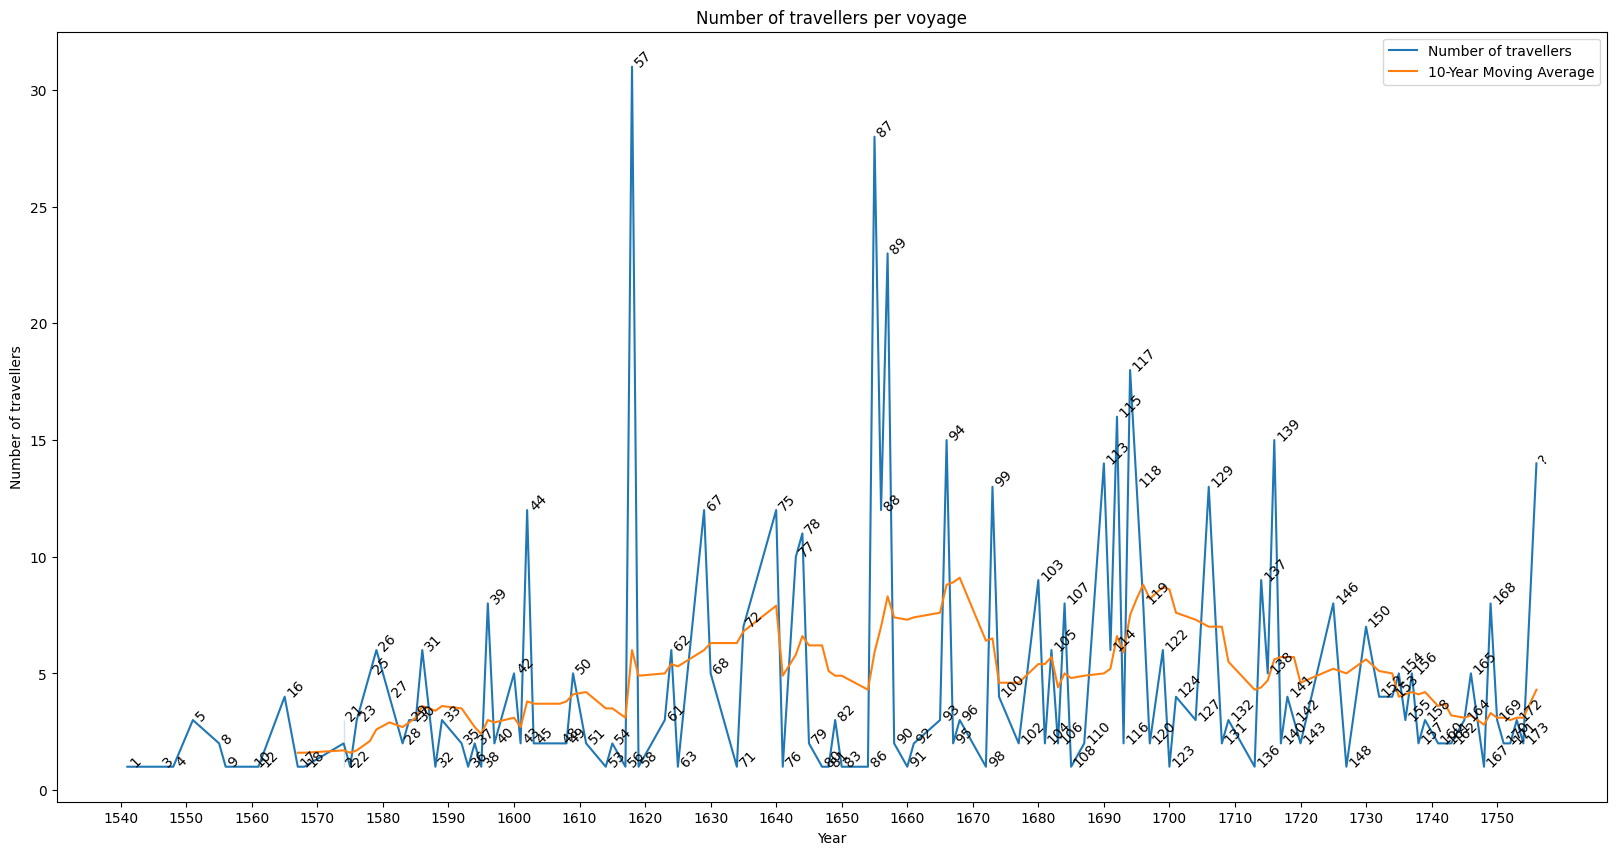

In [105]:
import pandas as pd

# Calculate the moving average
travellers_all_grouped['moving_average'] = travellers_all_grouped['count'].rolling(window=10).mean()

plt.figure(figsize=(20, 10))
sns.lineplot(data=travellers_all_grouped, x='wicky-viagem.date.year', y='count', label='Number of travellers')
sns.lineplot(data=travellers_all_grouped, x='wicky-viagem.date.year', y='moving_average', label='10-Year Moving Average')
plt.title('Number of travellers per voyage')
plt.xlabel('Year')
plt.ylabel('Number of travellers')
plt.xticks(range(1540, 1760, 10))

# label data points with the voyage name
for i, row in travellers_all_grouped.iterrows():
    plt.text(row['wicky-viagem.date.year'], row['count'], row['wicky-viagem'], rotation=45)

plt.legend()
plt.show()

In [93]:
import datetime

# Start and end dates
start_date = datetime.date(1755, 1, 1)
end_date = datetime.date(1758, 12, 31)

# Calculate the difference
diff = end_date - start_date

# Calculate the middle point
mid_point = diff // 2

# Calculate the middle date
middle_date = start_date + mid_point

print(middle_date)

1756-12-31
